## Read the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
plt.style.use('seaborn')

df = pd.read_excel('data/processed_data.xlsx')

## Transform the data

In [2]:
df['statuses_count'] = df['statuses_count'].apply(lambda x: np.log(x + 1)) 
df['followers_count'] = df['followers_count'].apply(lambda x: np.log(x + 1)) 
df['friends_count'] = df['friends_count'].apply(lambda x: np.log(x + 1)) 
df['favourites_count'] = df['favourites_count'].apply(lambda x: np.log(x + 1)) 
df['listed_count'] = df['listed_count'].apply(lambda x: np.log(x + 1)) 
df['tweet_freq'] = df['tweet_freq'].apply(lambda x: np.log(x + 1)) 
df['followers_growth_rate'] = df['followers_growth_rate'].apply(lambda x: np.log(x + 1)) 
df['friends_growth_rate'] = df['friends_growth_rate'].apply(lambda x: np.log(x + 1)) 
df['favourites_growth_rate'] = df['favourites_growth_rate'].apply(lambda x: np.log(x + 1)) 
df['listed_growth_rate'] = df['listed_growth_rate'].apply(lambda x: np.log(x + 1)) 
df['follower_friend_ratio'] = df['follower_friend_ratio'].apply(lambda x: np.log(x + 1)) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f1157c400>,
      dtype=object)

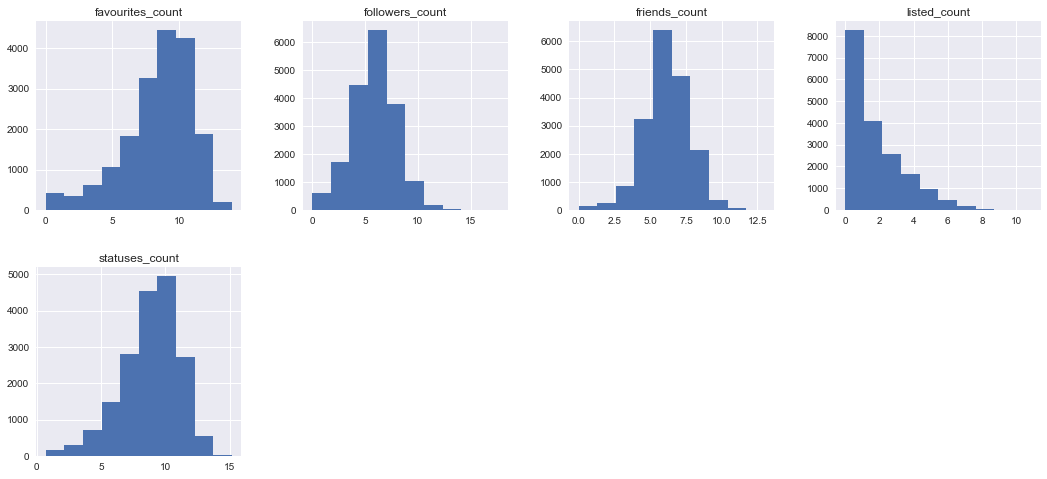

In [3]:
metadata_cols = ['statuses_count', 'followers_count', 'friends_count',
                 'favourites_count', 'listed_count']
meta_data = df[metadata_cols]
meta_data.hist(layout=(2, 4), figsize=(18,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f29143670>,
      dtype=object)

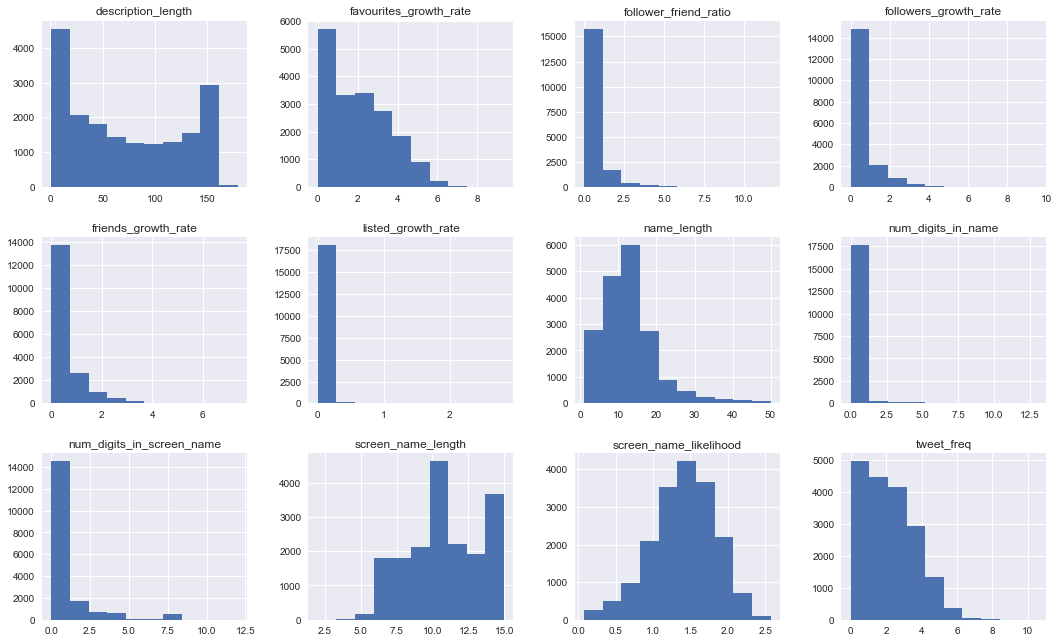

In [4]:
derived_feature_cols = ['tweet_freq', 'followers_growth_rate', 'friends_growth_rate',
                    'favourites_growth_rate', 'listed_growth_rate', 'follower_friend_ratio',
                    'screen_name_length', 'num_digits_in_screen_name',
                    'name_length', 'num_digits_in_name', 'description_length',
                    'screen_name_likelihood']
derived_features = df[derived_feature_cols]
derived_features.hist(layout=(4, 4), figsize=(18,15))

## Standardize the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f11357ee0>,
      dtype=object)

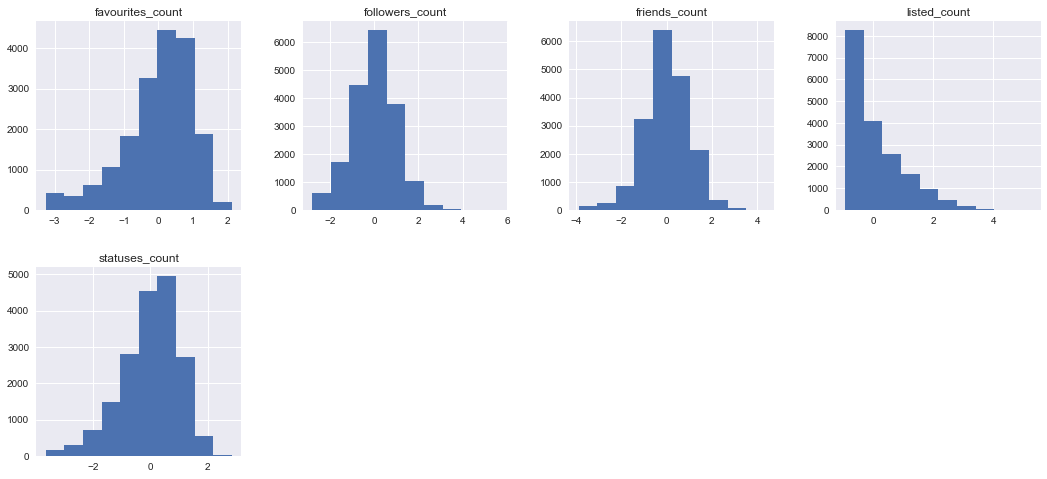

In [5]:
sc = StandardScaler()
meta_data_standard=StandardScaler().fit_transform(meta_data)# Gaussian Standardisation
meta_data_standard=pd.DataFrame(meta_data_standard,columns=metadata_cols)
meta_data_standard.hist(layout=(2, 4), figsize=(18,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f18d39df0>,
      dtype=object)

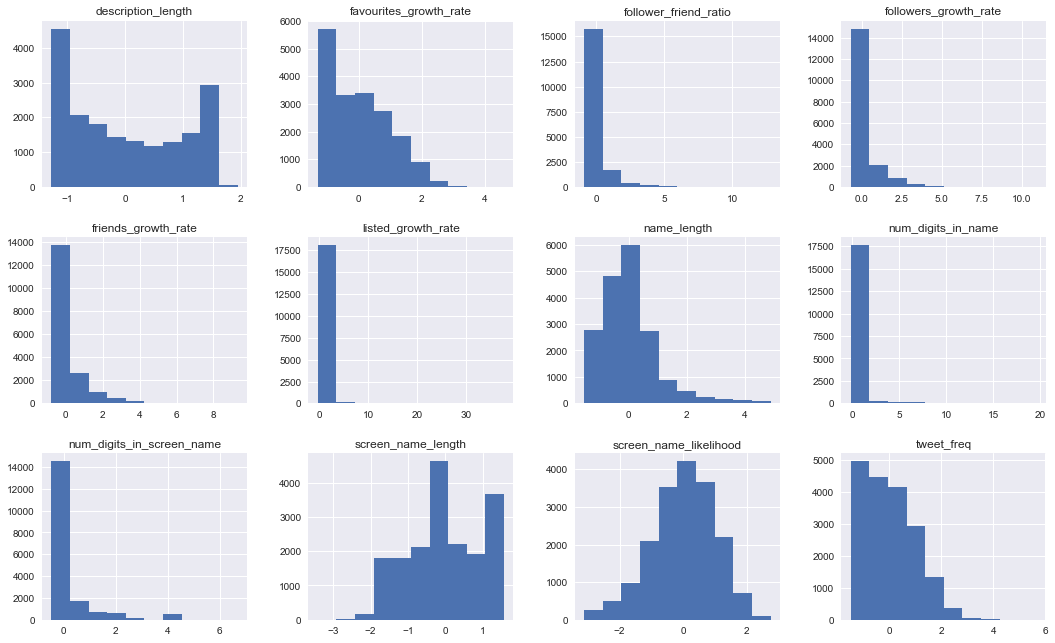

In [6]:
sc = StandardScaler()
derived_features_standard=StandardScaler().fit_transform(derived_features)# Gaussian Standardisation
derived_features_standard=pd.DataFrame(derived_features_standard,columns=derived_feature_cols)
derived_features_standard.hist(layout=(4, 4), figsize=(18,15))

## Combine the scaled features

In [7]:
#df_c = pd.concat([df_a.reset_index(drop=True), df_b], axis=1)
binary_metadata_cols = ['has_default_profile', 'verified']
binary_metadata = df[binary_metadata_cols]
response = df['bot']

merge = pd.concat([binary_metadata.reset_index(drop=True), meta_data_standard], axis=1)
merge = pd.concat([merge.reset_index(drop=True), derived_features_standard], axis=1)
merge = pd.concat([merge.reset_index(drop=True), response], axis=1)
merge.head()

,has_default_profile,verified,statuses_count,followers_count,friends_count,favourites_count,listed_count,tweet_freq,followers_growth_rate,friends_growth_rate,favourites_growth_rate,listed_growth_rate,follower_friend_ratio,screen_name_length,num_digits_in_screen_name,name_length,num_digits_in_name,description_length,screen_name_likelihood,bot
0,0,0,0.005429,0.519988,0.741486,-0.109920,1.108166,-0.655783,-0.318797,-0.211893,-0.806385,-0.084791,-0.250148,-0.727841,-0.483347,-0.352984,-0.192873,0.352314,-0.730803,False
1,0,0,-0.543221,-0.249593,-0.488192,-0.667506,0.773167,-1.187387,-0.623329,-0.703583,-1.178823,-0.175963,-0.073817,0.039714,-0.483347,0.694697,-0.192873,0.008760,0.140547,False
2,0,0,-0.591855,1.077515,1.141024,-0.325028,-0.016927,-0.816128,1.012239,0.962203,-0.648162,-0.194477,0.046785,0.423492,-0.483347,2.266219,-0.192873,1.437224,1.104570,False
3,0,0,-0.067349,-0.185283,0.130268,-0.006147,-0.144104,-0.514698,-0.543698,-0.415342,-0.521246,-0.221386,-0.458638,-0.727841,1.311539,-1.269706,-0.192873,-1.184641,-0.318263,False
4,0,0,0.152111,-0.911289,-0.281626,0.894586,-0.934199,0.015495,-0.637410,-0.475866,1.042624,-0.242631,-0.678184,1.574824,4.303016,-0.222024,-0.192873,-1.238886,0.286960,False


## Train a logistic regression model

In [8]:
features = binary_metadata_cols + metadata_cols + derived_feature_cols
train, test = train_test_split(merge, test_size = 0.2)
train_X = train[features]
train_y = train.bot
test_X = test[features] 
test_y = test.bot  
model = LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))
cm = metrics.confusion_matrix(test_y, prediction)
true_pos = cm[1,1]
true_neg = cm[0,0]
false_pos = cm[0,1]
false_neg = cm[1,0]
precision = true_pos/(true_pos + false_pos)
recall = true_pos/(true_pos + false_neg)

print("When we check precision of our regression model against the test data set, " + str(len(test_y)) + " accounts")
print("Precision - We predicted fake follower " + str(cm[1,1] + cm[0,1]) + " times and were correct " + str(cm[1,1]) + " times: " + str(cm[1,1]/(cm[1,1] + cm[0,1]))[0:4])
print("Recall - We predicted " + str(cm[1,1]) + " out of the " + str(cm[1,1] + cm[1,0]) + " fake followers: " + str(recall)[0:4])
print("")
print("Our total accuracy was (manually calculated))" + str((cm[0,0] + cm[1,1])/len(test_y))[0:5])
print("Our F1 score was " + str(2*(precision*recall)/(precision+recall))[0:5])

The accuracy of the Logistic Regression is 0.9874076101834109
When we check precision of our regression model against the test data set, 3653 accounts
Precision - We predicted fake follower 15 times and were correct 6 times: 0.4
Recall - We predicted 6 out of the 43 fake followers: 0.13

Our total accuracy was (manually calculated))0.987
Our F1 score was 0.206


In [9]:
metrics.precision_score(test_y, prediction)
cm = metrics.confusion_matrix(test_y, prediction)

true_neg = str(cm[0,0]) + "/" + str(cm[0,0] + cm[1,0]) + " (" + str(cm[0,0]/(cm[0,0] + cm[1,0]))[0:5] + ")"
false_pos = str(cm[0,1]) + "/" + str(cm[0,1] + cm[1,1]) + " (" + str(cm[0,1]/(cm[0,1] + cm[1,1]))[0:5] + ")"
false_neg = str(cm[1,0]) + "/" + str(cm[1,0] + cm[0,0]) + " (" + str(cm[1,0]/(cm[1,0] + cm[0,0]))[0:5] + ")"
true_pos = str(cm[1,1]) + "/" + str(cm[1,1] + cm[0,1]) + " (" + str(cm[1,1]/(cm[1,1] + cm[0,1]))[0:5] + ")"

conf_matrix = pd.DataFrame({'Not Fake Follower': [true_neg, false_neg],
                            'Fake Follower': [false_pos, true_pos],
                            'Support': [cm[0,0] + cm[0,1], cm[1,0] + cm[1,1]]},
                    index = ['Not Fake Follower', 'Fake Follower'])
conf_matrix


,Not Fake Follower,Fake Follower,Support
Not Fake Follower,3601/3638 (0.989),9/15 (0.6),3610
Fake Follower,37/3638 (0.010),6/15 (0.4),43


In [10]:
print(metrics.classification_report(test_y,prediction))

              precision    recall  f1-score   support

       False       0.99      1.00      0.99      3610
        True       0.40      0.14      0.21        43

    accuracy                           0.99      3653
   macro avg       0.69      0.57      0.60      3653
weighted avg       0.98      0.99      0.98      3653



## Train a random forrest model

In [11]:
# features = binary_metadata_cols + metadata_cols + derived_feature_cols
# train, test = train_test_split(merge, test_size = 0.2)
# train_X = train[features]
# train_y = train.bot
# test_X = test[features] 
# test_y = test.bot  
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
#print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))
cm = metrics.confusion_matrix(test_y, prediction)
true_pos = cm[1,1]
true_neg = cm[0,0]
false_pos = cm[0,1]
false_neg = cm[1,0]
precision = true_pos/(true_pos + false_pos)
recall = true_pos/(true_pos + false_neg)

print("When we check precision of our RFM model against the test data set, " + str(len(test_y)) + " accounts")
print("")
print("Precision - We predicted fake follower " + str(cm[1,1] + cm[0,1]) + " times and were correct " + str(cm[1,1]) + " times: " + str(cm[1,1]/(cm[1,1] + cm[0,1]))[0:5])
print("Recall - We predicted " + str(cm[1,1]) + " out of the " + str(cm[1,1] + cm[1,0]) + " fake followers: " + str(recall)[0:5])
print("")
print("Our total accuracy was " + str((cm[0,0] + cm[1,1])/len(test_y))[0:5])
print("Our F1 score was " + str(2*(precision*recall)/(precision+recall))[0:5])

When we check precision of our RFM model against the test data set, 3653 accounts

Precision - We predicted fake follower 45 times and were correct 11 times: 0.244
Recall - We predicted 11 out of the 43 fake followers: 0.255

Our total accuracy was 0.981
Our F1 score was 0.25


In [12]:
true_neg = str(cm[0,0]) + "/" + str(cm[0,0] + cm[1,0]) + " (" + str(cm[0,0]/(cm[0,0] + cm[1,0]))[0:5] + ")"
false_pos = str(cm[0,1]) + "/" + str(cm[0,1] + cm[1,1]) + " (" + str(cm[0,1]/(cm[0,1] + cm[1,1]))[0:5] + ")"
false_neg = str(cm[1,0]) + "/" + str(cm[1,0] + cm[0,0]) + " (" + str(cm[1,0]/(cm[1,0] + cm[0,0]))[0:5] + ")"
true_pos = str(cm[1,1]) + "/" + str(cm[1,1] + cm[0,1]) + " (" + str(cm[1,1]/(cm[1,1] + cm[0,1]))[0:5] + ")"

conf_matrix = pd.DataFrame({'Not Fake Follower': [true_neg, false_neg],
                            'Fake Follower': [false_pos, true_pos],
                            'Support': [cm[0,0] + cm[0,1], cm[1,0] + cm[1,1]]},
                    index = ['Not Fake Follower', 'Fake Follower'])
conf_matrix

,Not Fake Follower,Fake Follower,Support
Not Fake Follower,3576/3608 (0.991),34/45 (0.755),3610
Fake Follower,32/3608 (0.008),11/45 (0.244),43


In [13]:
print(metrics.classification_report(test_y,prediction))

              precision    recall  f1-score   support

       False       0.99      0.99      0.99      3610
        True       0.24      0.26      0.25        43

    accuracy                           0.98      3653
   macro avg       0.62      0.62      0.62      3653
weighted avg       0.98      0.98      0.98      3653



## BotometerLite Predictions

     k        f1
0  0.6  0.235033


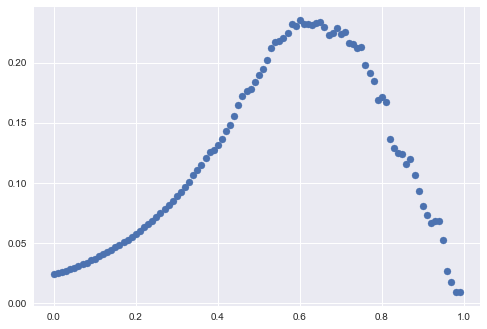

In [14]:
def tune_threshold(k):
    bot_lite_threshold = k
    benchmark = pd.DataFrame({'bot_lite_prediction': df['bot_lite'] >= bot_lite_threshold,
                              'botometer_label': df['bot']})
    true_pos = sum((benchmark['bot_lite_prediction'] == True) & (benchmark['botometer_label'] == True))
    false_pos = sum((benchmark['bot_lite_prediction'] == True) & (benchmark['botometer_label'] == False))
    true_neg = sum((benchmark['bot_lite_prediction'] == False) & (benchmark['botometer_label'] == False))
    false_neg = sum((benchmark['bot_lite_prediction'] == False) & (benchmark['botometer_label'] == True))
    precision = true_pos/(true_pos + false_pos)
    recall = true_pos/(true_pos + false_neg)
    f1 = 2*(precision*recall)/(precision+recall)
    return f1

f1_scores = []
for k in range(0,100):
    f1 = pd.DataFrame({'k': [k/100],
                       'f1': tune_threshold(k/100)})    
    f1_scores.append(f1)
f1_scores = pd.concat(f1_scores)
print(f1_scores[f1_scores['f1'] == max(f1_scores['f1'])])
plt.scatter(f1_scores.k, f1_scores.f1)


In [15]:
bot_lite_threshold = 0.6
benchmark = pd.DataFrame({'bot_lite_prediction': df['bot_lite'] >= bot_lite_threshold,
                          'botometer_label': df['bot']})
true_pos = sum((benchmark['bot_lite_prediction'] == True) & (benchmark['botometer_label'] == True))
false_pos = sum((benchmark['bot_lite_prediction'] == True) & (benchmark['botometer_label'] == False))
true_neg = sum((benchmark['bot_lite_prediction'] == False) & (benchmark['botometer_label'] == False))
false_neg = sum((benchmark['bot_lite_prediction'] == False) & (benchmark['botometer_label'] == True))

precision = true_pos/(true_pos + false_pos)
recall = true_pos/(true_pos + false_neg)

precision

print("When we check precision of BotometerLite against the entire data set, " + str(len(benchmark)) + " accounts")
print("")
print("Precision - BotometerLite predicted fake follower " + str(sum(benchmark['bot_lite_prediction'] == True)) + " times and was correct " + str(true_pos) + " times: " + str(precision)[0:5])
print("Recall - BotometerLite predicted " + str(true_pos) + " out of the " + str(sum(benchmark['botometer_label'] == True)) + " fake followers: " + str(recall)[0:5])
print("")
print("BotometerLite's total accuracy was " + str((true_pos + true_neg)/len(benchmark)) + "%")
print("BotometerLite's F1 score was " + str(2*(precision*recall)/(precision+recall))[0:5])


When we check precision of BotometerLite against the entire data set, 18264 accounts

Precision - BotometerLite predicted fake follower 679 times and was correct 106 times: 0.156
Recall - BotometerLite predicted 106 out of the 223 fake followers: 0.475

BotometerLite's total accuracy was 0.9622207621550591%
BotometerLite's F1 score was 0.235
